# Background Note 

# Probability: Normal Distribution and Central Limit Theorem

## By Albert S. Kyle

Please let me know about errors or typos.

$\def \sm {} \renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\def \mm {} \renewcommand{\mm}{{\scriptsize @}}$
$\def \E {} \renewcommand{\E}{\mathrm{E}}$
$\def \e {} \renewcommand{\e}{\mathrm{e}}$
$\def \drm {} \renewcommand{\drm}{\mathrm{\, d}}$
$\def \var {} \renewcommand{\var}{\mathrm{var}}$
$\def \cov {} \renewcommand{\cov}{\mathrm{cov}}$
$\def \corr {} \renewcommand{\corr}{\mathrm{corr}}$
$\def \stdev {} \renewcommand{\stdev}{\mathrm{stdev}}$
$\def \t {} \renewcommand{\t}{^{\mathsf{T}}}$
$\def \comma {} \renewcommand{\comma}{\, , \,}$
$\def \vec {} \renewcommand{\vec}[1]{\mathbf{#1}}$
$\def \skew {} \renewcommand{\skew}{\mathrm{skew}}$
$\def \kurt {} \renewcommand{\kurt}{\mathrm{kurt}}$
$\def \prob {} \renewcommand{\prob}{\textrm{prob}}$
$\def \midx {} \renewcommand{\midx}{\, \mid \,}$


### Summary

This Background Note reviews properties of normal distributions.

#### Exercises

There are several exercises (called "problems").  I encourage you to attempt to do the exercises.  Answers to the exercises are provided in a seaprate notebook.

##### Conventions

These notes define the function `f()` so that its definition changes from cell to cell.  By using local variables to make the examples self-contained, this approach avoids name clashes, except for the name of the function `f()` itself. 

In [13]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import timeit
import math
import statistics
import nbconvert

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("Timestamp:", timestamp)

tstart = timeit.default_timer()


Python version 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:06:27) [MSC v.1942 64 bit (AMD64)]
Pandas version 2.2.3
NumPy version 1.26.4
SciPy version 1.15.1
matplotlib version 3.10.0
Timestamp: 2025-09-02 16:26:25


### Normal random variable
 
The **standard normal distribution** with mean 0 and variance 1 has probability density function

\begin{equation}
f(z) =  \frac{1}{\sqrt{2 \pi}} \sm \e^{-z^2 / 2}, \qquad \text{for  } z \in \mathcal{R} .
\end{equation}

Given a standard normal random variable $Z$, the rescaled random variable $X = Z \sm \sigma + \mu$ has mean $\mu$ and standard deviation $\sigma$. Using a change of variables from integral calculus, the pdf can be shown to be

\begin{equation}
f(x) =  \frac{1}{\sigma \sm \sqrt{2 \sm \pi}} \sm \exp \left( -\tfrac{1}{2} \sm \frac{(z - \mu)^2}{\sigma^2} \right). 
\qquad \text{for  } x \in \mathcal{R} .
\end{equation}

The normal distribution with mean $\mu$ and standard deviation $\sigma$ is denoted $\mathcal{N}(\mu,\sigma)$.

### Normal CDF

The cdf of a normal distribution is the integral

\begin{equation}
f(x_0) = \int_{x=-\infty}^{x_0} \frac{1}{\sqrt{2 \sm \pi} \sm \sigma} \sm \exp \left( -\tfrac{1}{2} \sm \frac{(z - \mu)^2}{\sigma^2} \right) \drm x , 
\qquad \text{for } x \in \mathcal{R} .
\end{equation}

This integral does not have a closed form solution.

Both `scipy.stats.norm(...).cdf(...)` and Python's `statistics.NormalDist().cdf(...)` give accurate approximations for the the normal cdf. We can easily calculate the probability that a standard normal random variable has an outcome in the interval $[a,b]$.

The function `scipy.stats.norm(...)` can take numpy arrays as arguments. The Python function `statistics.NormalDist().cdf(...)` is restricted to scalars, which may makeit less useful in finance applications. 

### Bell Curve

Here is a plot of the pdf for a normal distribution. The shape is often called a **Bell Curve**. In fact, the normal distribution's pdf has very "**thin tails**". This means that unusually large or small values, beyond say $\pm 4$ standard deviations, are very unusual.  This issue turns out to be of great importance in finance, where where a Bell curve may superficially appear to fit data, but in fact outliers are much more common than predicted by a normal distribution.  

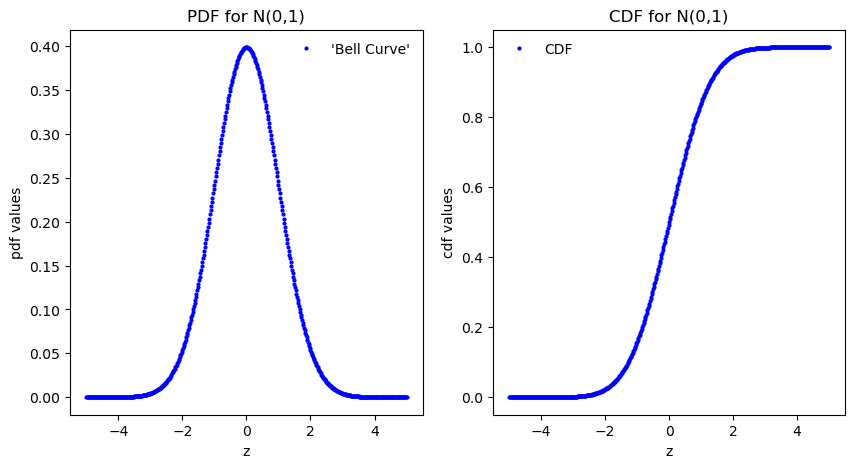

In [14]:
def f():
    nobs = 501
    zmin = -5.00
    zmax = +5.00

    z = np.linspace(start=zmin, stop=zmax, num=nobs, endpoint=True)

    norm01 = scipy.stats.norm(0.00, 1.00)
    pdf = norm01.pdf(z)
    cdf = norm01.cdf(z)

    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].set_title("PDF for N(0,1)")
    ax[0].set_xlabel("z")
    ax[0].set_ylabel("pdf values")
    ax[0].plot(z, pdf, 'bo', ms=2, label="'Bell Curve'")
    ax[0].legend(loc='best', frameon=False)

    ax[1].set_title("CDF for N(0,1)")
    ax[1].set_xlabel("z")
    ax[1].set_ylabel("cdf values")
    ax[1].plot(z, cdf, 'bo', ms=2, label="CDF")
    ax[1].legend(loc='best', frameon=False)

    plt.show()

f()


### Problem 1 (Easy)

Verify by applying the actual pdf formula for the standard normal distribution that `scipy.stats.norm(0.00, 1.00).pdf(z)` gives the correct pdf for the standard normal distribution.

### Examples of probabilities from normal distribution

I often use the following intuition for a normal distribution:

1. The probability of being within $\pm1$ standard deviations of the mean is about $2/3$.

2. The probabiity of being within $\pm 2$ standard deviations of the mean is about 95 percent.

3. The probability of being beyond $\pm4$ standard deviations is close to zero.

How accurate is this imprecise intuition? Here is the answer:

In [15]:
def f():
    
    rvz = scipy.stats.norm(loc=0.00, scale=1.00)
    rv = statistics.NormalDist(0.00, 1.00)

    for (z0, z1) in ((-1.0, 1.0), (-2.0, 2.0), (-4.00, +4.00), (0.00, 5.00), (2.00, 10.00)):
        pz = rvz.cdf(z1) - rvz.cdf(z0)
        p = rv.cdf(z1) - rv.cdf(z0)
        print(f"{z0=}, {z1=}, {pz =}, {p =}")
        
f()        

z0=-1.0, z1=1.0, pz =0.6826894921370859, p =0.6826894921370856
z0=-2.0, z1=2.0, pz =0.9544997361036416, p =0.9544997361036418
z0=-4.0, z1=4.0, pz =0.9999366575163338, p =0.9999366575163338
z0=0.0, z1=5.0, pz =0.4999997133484281, p =0.4999997133484282
z0=2.0, z1=10.0, pz =0.02275013194817921, p =0.022750131948179098


### Problem 2 (easy)

The stock market is often thought to have a standard deviation of about 1 percent per day. This percentage standard deviation of 0.01 is often called **volatility** instead of **standard deviation**. On October 19, 1987, the stock market fell more than 30 percent in one day. Theoretically, this would be a "30 standard deviation event".

1. What is the probability of a change in the stock market value with absolute value greater than 3 percent in one day, assuming a typical daily volatility of 1 percent?

2. How many 30 percent or greater stock market crashes would occur on average every 1000 years if the daily volatility were 2 percent (approximately double typcical daily volatility)?

### Linear combinations of independently distributed normal random variables

Let random variables $X_0 \sim \mathcal{N}(\mu_0, \sigma^2_0)$ and $X_1 \sim \mathcal{N}(\mu_1, \sigma^2_1)$ be independently distributed. Let $a_0$ and $a_1$ be constants. For arbitrary random variables, we already know that the linear combination $a_0 \sm X_0 + a_1 \sm X_1$ is a random variable with mean $a_0 \sm \mu_0 + a_1 \sm \mu_1$ and variance $a^2_0 \sm \sigma^2_0 + a^2_1 \sm \sigma^2_1$. If $X_0$ and $X_1$ are **normally** distributed, then it is also the case that the linear combination is normally distributed. We therefore have 

\begin{equation}
a_0 \sm X_0 + a_1 \sm X_1 \sim \mathcal{N}(a_0 \sm \mu_0 + a_1 \sm \mu_1, a^2_0 \sm \sigma^2_0 + a^2_1 \sm \sigma^2_1) .
\end{equation}



### Central Limit Theorem

Consider an infinite sequence of identically and independently distributed random variables $X_0$, $X_1$, $\dots$, with the same means $\mu$ and the same standard deviations $\sigma$. Let $\bar X_N$ denote the average of the first $N$ random variables in the sequence, $\bar X_N := \tfrac{1}{N} \sm \sum_{n=0}^{N-1} X_n$. The mean $\bar X_N$ is itself a random variable. We know from the **law of large numbers** than $\bar X_N$ converges to $\mu$ as $N \rightarrow \infty$. We also know that $\var[\bar X_N] = \sigma^2 / N$ (Why?). 

The fact that the variance of the sample mean decreases as $N$ increases is of fundamental importance in statistics. Since the variance decreases as $N$ increases, the sample mean becomes a more accurate estimate of the true mean as $N$ increases. The rescaled random variable $(X_N - \mu) \sm \sqrt{N}$ has mean 0 and standard deviation $\sigma$. 

The Central Limit Theorem says that the shape of the distribution of $(X_N - \mu) \sm \sqrt{N}$ converges to a normal distribution $\mathcal{N}(0 \comma \sigma^2)$ in the limit as $N \rightarrow \infty$, even thought $X_n$ are not necessarily normally distributed. Mathematicians have proved many different versions of the Central Limit Theorem. The **Lindeberg-Levy Central Limit Theorem** says the sequence $(X_N - \mu) \sm \sqrt{N} $ **converges in distribution** to the distribution for $\mathcal{N}(0, \sigma^2)$. If $F_N$ denotes the cdf of the distribution for $(\bar X_N - \mu) \sm \sigma$ and $F$ denotes the cdf for $\mathcal{N}(0, \sigma)$, convergence in distribution means that,  for any number $x$, we have $F_N(x) \rightarrow F(x)$ as $N \rightarrow \infty$.

There are different variations of the Central Limit Theorem which allow the independently distributed random variables $X_0, X_1, \ldots$ to have different means and variances or even different distributions from one another.

By scaling with the standard deviation, the Central Limit Theorem can be restated to say that $(X_N - \mu) \sm \sqrt{N} / \sigma $ converges in distribution to $\mathcal{N}(0, 1)$.


### Convergence of Binomial Distribution to Normal Distribution

For a small number of trials $N$, the binomial distribution does not look at all like a normal distribution. Since the binomial is the sum of identically distributed Bernoulli random variables, the Central Limit Theorem applies to the binomial distribution as the number of trials increases without bound. For a large number of Bernoulli trials $N$, the pmf of the binomial distribution, when scaled properly, looks like the pdf of a normal distribution. 

The next cell illustrates the Central Limit Theorem for the binomial distribution, rescaled to match a standard normal distribution. Notice that comparing a discrete pmf to a continuous pdf requires some rescaling.  Notice also that the cdf of the binomial jumps at every integer number of successes. Even though the rescaled cdf of the binomial is a discontinuous function with jumps, these jumps become small as the number of trials increases.  Thus, the discontinuous binomial cdf still converges to the continuous normal cdf as $N\rightarrow \infty$.


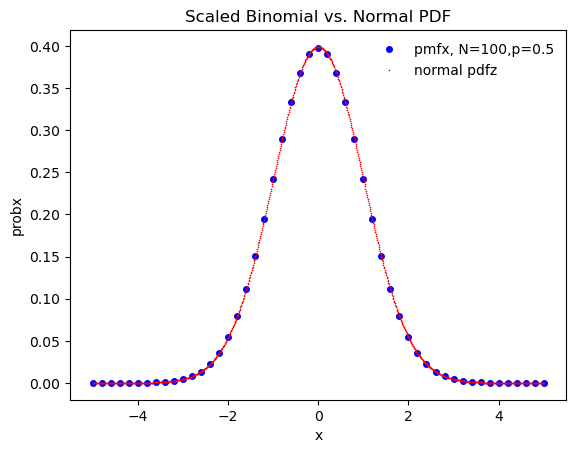

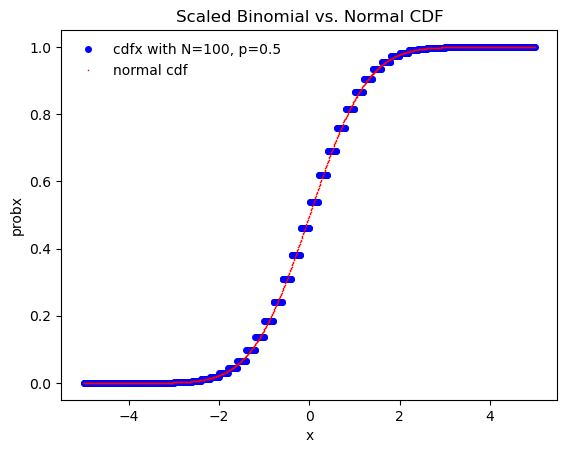

In [16]:
p = 0.50
N = 100  #number of Bernoulli trials in binomial distribution

Nz = 1000  # number of points to plot

nstd = 5.0

rvb = scipy.stats.binom(N, p)
#ns = np.arange(N+1)
ns = np.arange(int(rvb.mean() - nstd * rvb.std()), int(rvb.mean() + nstd * rvb.std()) + 1)
xns = np.linspace(int(rvb.mean() - nstd * rvb.std()), int(rvb.mean() + nstd * rvb.std()), Nz)
z = np.linspace(-nstd, nstd, Nz)

pmfn = rvb.pmf(ns)
cdfx = rvb.cdf(xns)

pdfz = scipy.stats.norm(0,1).pdf(z)
cdfz = scipy.stats.norm(0,1).cdf(z)

# Rescale outcomes to have mean 0 and standard deviation 1
x = (ns - rvb.mean()) / rvb.std()
xn = (xns - rvb.mean()) / rvb.std()
# Rescale pmf to be similar to standard normal
pmfx = pmfn / (x[1] - x[0])

fig, ax = plt.subplots(1, 1)
ax.set_title("Scaled Binomial vs. Normal PDF")
ax.set_xlabel("x")
ax.set_ylabel("probx")
ax.plot(x, pmfx, 'bo', ms=4, label="pmfx, N=" + str(N) + ",p=" + str(p))
ax.plot(z, pdfz, 'rx', ms=0.50, 
        label='normal pdfz')
# ax.vlines(ns, 0, freqns, colors='r', lw=1, alpha=0.5)

ax.legend(loc='best', frameon=False)

plt.show()

fig, ax = plt.subplots(1, 1)
ax.set_title("Scaled Binomial vs. Normal CDF")
ax.set_xlabel("x")
ax.set_ylabel("probx")
ax.plot(xn, cdfx, 'bo', ms=4, label="cdfx with N=" + str(N) + ", p=" + str(p))
ax.plot(z, cdfz, 'rx', ms=0.50, 
        label='normal cdf')
# ax.vlines(ns, 0, freqns, colors='r', lw=1, alpha=0.5)

ax.legend(loc='best', frameon=False)

plt.show()


### Problem 3

Researchers (like me) often informally assume that a random variable will lie with $\pm 2$ standard deviations of the mean about 95 percent of the time ("two-tailed test"). This implies a 97.5 percent probability that the outcome is less than $+2$ standard deviations and a $97.5$ percent probability that the outcome is greater than $-2$ standard deviations ("one-tailed test").

1. Using `scipy.stats.binom(...).cdf(...)`, verify whether this intuition is reasonable for binomial random variables with numbers of trials $N=5$, $10$, $20$, $40$, $100$, $500$ and probabilities of success $p=0.05$, $0.10$, $0.25$, $0.50$, $0.75$, $0.90$, and $0.95$. Express the result as a Pandas dataframe with rows corresponding to values of $N$, columns corresponding to values of $p$, and cell values equal to the one-tailed test. Include a row for the normal distribution represented by $N=0$. (The notation $N=\infty$ would be better notation, but Numpy's integer dtype does not support infinity.)

2. Explain why it is unnecessary to construct two dataframes, one for a right-tail probabilities and one for left-tail probabilities.


### Covariance Matrix
 
Let $\vec{X} = \big( \vec{X}[0], \ldots, \vec{X}[M-1] \bigr)$ be a vector of $M$ random variables with vector of means $\pmb{\mu} := \bigl( \mu[0], \ldots, \mu[M-1] \bigr)$ and **covariance matrix** $\vec{\Sigma}$, defined by $\vec{\Sigma}[m,m] := \var[\vec{X}[m]]$ for diagonal elements and $\vec{\Sigma}[m,n] = \cov[X[m] \comma X[n]]$ for off-diagonal elements $m \ne n$. 

Any covariance matrix is **symmetric** and **positive semi-definite**. It is **symmetric** because covariance is symmetric: $\cov \left[ \vec{X}[n] \comma \vec{X}[m] \right] = \cov \left[ \vec{X}[m] \comma \vec{X}[n] \right]$; thus $\vec{\Sigma}[m,n] = \vec{\Sigma}[m,n]$. It is **positive semi-definite** because, for any $M$-vector $\vec{a}$, the variance of the a linear combination of random variables $\vec{a} \t \mm \vec{X}$ is a **quadratic form** which equals $\vec{a} \t \mm \vec{\Sigma} \mm \vec{a}$, which must be nonnegative, defining positive semi-definiteness. 

The covariance matrix is **positive definite** if, for any nonzero vector $\vec{a}$, we have $\var \left[  \vec{a} \t \mm \vec{X} \right] > 0$; this implies that non-trivial linear combinations of random variables, $ \vec{a} \t \mm \vec{X}$, are not exactly zero with probability one. If, for some some $\vec{a} \ne \vec{0}$, we have $ \vec{a} \t \mm \vec{X} = 0$ with probability one, then the covariance matrix $\vec{\Sigma}$ is positive semidefinite but not positive definite. 

### Joint normal distribution

Assume that $\vec{\Sigma}$ is **nonsingular**. Since it is a covariance matrix, the matrix $\vec{\Sigma}$ must also be positive definite. This is true because, for any $M$-vector $\vec{a}$, except for a vector of zeros, the univariate random variable $\vec{a} \t \mm \vec{X}$ has strictly positive variance give by the quadratic form $\vec{a} \t \mm \vec{\Sigma} \mm \vec{a}$.

The elements of $\vec{X}$ are **joint normal** random veriables with mean $\pmb{\mu}$ and variance $\vec{\Sigma}$, in which case we write $\vec{X} \sim \mathcal{N}(\pmb{\mu}, \vec{\Sigma})$, if and only if any one of the following three conditions holds, in which case all three conditions hold:

1. There exists a vector of independently distributed standard normal random variables $\vec{Z} \sim \mathcal{N}(\vec{0}, \vec{1})$ such that $\vec{X} = \vec{A} \mm \vec{Z} + \pmb{\mu}$, in which case $\vec{\Sigma} = \vec{A} \mm \vec{A} \t$.

2. For any $M$-vector $\vec{a}$, the linear combination $\vec{a} \t \vec{X}$ has a univariate normal distribution.

3. For any realizations $\vec{x}=(x_1, \ldots, x_M)$, the **joint density** is given by

\begin{equation}
f_\vec{X}(\vec{x}) = \frac{\exp \left( -\frac{1}{2} \sm (\vec{x} - \pmb{\mu}) \t \mm
\vec{\Sigma}^{-1} \mm (\vec{x} - \pmb{\mu}) \right) }{ \sqrt{(2 \sm \pi)^M \sm \mathrm{det}(\vec{\Sigma})}} .
\end{equation}

In this formula, $\mathrm{det}(\vec{\Sigma})$ denotes the determinant of $\vec{\Sigma}$ (discussed where the Background Note on Multiple OLS discusses matrix decompositions). 

The definition of the joint density resembles the definition of the density for a univariate normal random variable, $\tfrac{1}{\sigma \sm \sqrt{2 \sm \pi}} \sm \exp \left( -\tfrac{1}{2} \sm \frac{(z - \mu)^2}{\sigma^2} \right)$. In the definition, the inverse $\vec{\Sigma}^{-1}$ replaces the reciprocal of the variance in the exponent, the determinant $\mathrm{det}(\vec{\Sigma})$ under the square root replaces the standard deviation multiplying $\sqrt{2 \sm \pi}$, and a quadratic form replaces the quadratic term in the exponent.  

If $\vec{\Sigma}$ is not positive definite, then the density $f_\vec{X}(\vec{x})$ is not defined because the inverse $\vec{\Sigma}^{-1}$ does not exist and the determinant $\lvert \vec{\Sigma} \rvert$ is zero. This issue can be dealt with by dropping enough individual components from $\vec{X}$ to make the covariance matrix nonsingular.

The matrix $\vec{A}$ cannot generally be inferred from the matrix $\vec{\Sigma}$.  The matrix $\vec{A}$ can be an arbitrary matrix defined by any $M^2$ numbers.  Since $\vec{\Sigma}$ is positive definite, it is defined by only $M \sm (M+1) / 2$ numbers. There are many matrices $\vec{A}$ which define the same covariance matrix $\vec{\Sigma}$.

The random vector $\vec{a} \t \vec{X}$ is distributed $\mathcal{N}( \vec{a} \t \mm \pmb{\mu} \comma \vec{a} \t \vec{\Sigma} \mm \vec{a})$.

Joint normality of three or more random variables is not implied by pairwise joint normality!

### Simulating joint normal random variables

An efficient way to simulate joint normal random variables is to use bullet point 1 in the previous cell: Given a covariance matrix $\vec{\Sigma}$, find a matrix $\vec{A}$ such that $\vec{\Sigma} = \vec{A} \mm \vec{A}\t$, simulate standard normal random variables $\vec{Z}$, then calculate the desired simulated random variables $\vec{X} = \vec{A} \mm \vec{Z} + \pmb{\mu}$. This approach is efficient because standard normal random variables are easier to simulate than joint normal random variables with an arbitrary covariance matrix.

The matrix $A$ is not uniquely defined by the covariance matrix $\Sigma$. Thus, there are many matrices $\vec{A}$ that satisfy $\vec{\Sigma} = \vec{A} \mm \vec{A}\t$. If $\Sigma$ has full rank, one way to find a matrix $\vec{A}$ is to use a Cholesky decomposition, which finds a lower (or upper) triangular matrix $\vec{A}$ relatively efficiently.

Here is an example, which simulates $N$ independent pairs of random variables as a $2 \times N$ matrix, where each pair has a given $2 \times 2$ covariance matrix:

In [17]:
N = 10**6
Sigma = np.array([[16.00, 10.00],[10.00, 16.00]], dtype=np.float64)
M = Sigma.shape[0]  # M = 2 because Sigma is 2 x 2
mu = np.array([100.00] * M, dtype=np.float64).reshape((M, 1))

# Calculate A as a lower triangular matrix using np.linalg.cholesky:
A = np.linalg.cholesky(Sigma)  
rng = np.random.default_rng(seed=1234)
z = rng.standard_normal((M, N))
x = A @ z + mu

print(f"{Sigma=}\n{A=}")
if N <= 20:
    print(f"{z=}\n{x=}\n{x.shape=}")

meanvec1 = x.sum(axis=1) / N
meanvec2 = x.mean(axis=1)

assert np.isclose(meanvec1, meanvec2, rtol=1e-12).all(), "Error: Two ways of calculating mean should give same result."

print(f"{meanvec1 = }\n{meanvec2 = }")

# Sample covariance matrix from simulated data (should approximate the matrix Sigma):
# Calculated "by hand"
covmat1 = (x - mu) @ (x - mu).T / N
xm = x - x.mean(axis=1).reshape((2, 1))
covmat2 = (xm @ xm.T) / (N-1)
# Calculated using np.cov:
covmat3 = np.cov(x, ddof=1)

assert np.isclose(covmat2, covmat3, rtol=1e-12).all(), "Error: Two ways of calculating covariance should give same result."

print(f"{covmat1 = }\n{covmat2 = }\n{covmat3 = }")


Sigma=array([[16., 10.],
       [10., 16.]])
A=array([[4.      , 0.      ],
       [2.5     , 3.122499]])
meanvec1 = array([100.00456667, 100.00279614])
meanvec2 = array([100.00456667, 100.00279614])
covmat1 = array([[15.994804  ,  9.98181103],
       [ 9.98181103, 15.9473459 ]])
covmat2 = array([[15.99479914,  9.98180825],
       [ 9.98180825, 15.94735403]])
covmat3 = array([[15.99479914,  9.98180825],
       [ 9.98180825, 15.94735403]])


### Conditional distribution of joint normal random variables

Joint normal random variables are special because conditional densities are joint normal, conditional expectations are linear, and conditional variances are constant. 

Let $\vec{X}$ and $\vec{Y}$ be random vectors such that $(\vec{X} \comma \vec{Y})$ is joint normal. We can express the covariance matrix $\vec{\Sigma}$ in block form as

\begin{equation}
\vec{\Sigma} =  \left[ 
\begin{array}{cc}
\var[\vec{X}] & \cov[\vec{X} \comma \vec{Y}] \\
 \cov[\vec{Y} \comma \vec{X}] & \var[\vec{Y}]
\end{array} \right] .
\end{equation}

Recall that we require $\vec{\Sigma}$ to be invertible and therefore positive definite.

The distribution of $Y$ conditional on $X$ is a multivariate normal distribution $(\vec{Y} \midx \vec{X} = \vec{x}) \sim \mathcal{N}(\bar{\pmb{\mu}} \comma \bar{\vec{\Sigma}})$ with

\begin{equation}
\begin{aligned}
\bar{\pmb{\mu}} &= \pmb{\mu}_{\vec{X}} + (\var[\vec{X}]^{-1} \mm \cov[\vec{X} \comma \vec{Y}]) \t (\vec{x} - \pmb{\mu_{\vec{X}}}), \\
\bar{\vec{\Sigma}} &= \var[\vec{Y}] - \cov[\vec{X} \comma \vec{Y}] \t \mm  \var[\vec{X}]^{-1} \mm \cov[\vec{X} \comma \vec{Y}]  .
\end{aligned}
\end{equation}

For arbitrary random variables, the expectation of $\vec{Y}$ conditional on $\vec{X} = \vec{x}$ and the variance of $\vec{Y}$ conditional on $\vec{X} = \vec{x}$ are potentially nonlinear functions of $\vec{x}$.  

In our assumed special case of joint normal random variables, the conditional expectation $\bar{\pmb{\mu}}$ is a **linear regression** function of $\vec{x}$ defined by the matrix of **regression coefficients** $\var[\vec{X}]^{-1} \mm \cov[\vec{X} \comma \vec{Y}]$. 

For arbitrary random variables, the conditional variance is a function of the realizations $\vec{x}$.

In our assume special case of joint normal random variables, the conditional variance $\bar{\vec{\Sigma}}$ is a matrix of constants which do not depend on the particular realizations $\vec{x}$. Conditioning on $\vec{X} = \vec{x}$ reduces the positive definite matrix $\var[\vec{Y}]$ by the positive definite matrix $\cov[\vec{X} \comma \vec{Y}] \t  \var[\vec{X}]^{-1} \mm \cov[\vec{X} \comma \vec{Y}] $, with the resulting difference $\vec{\Sigma}$ also positive definite.

If $\var[{\vec{X}}]$ is not positive definite, it is not invertible; thus, the formulas for $\bar{\pmb{\mu}}$ and $\bar{\vec{\Sigma}}$ are not valid.  In this case, the linear regression has **multicollinearity**. If $\var[\vec{X}]$ is replaced by its **pseudoinverse** (**generalized inverse**, **Moore-Penrose Inverse**), denoted $\var[\vec{X}]^+$, the formulas become valid.


In [18]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} s")


Finished: timestamp = '2025-09-02 16:26:25'
Execution time = 0.3000302000436932 s
